# 演習 1

## はじめに

### 目的
この演習では入社後必要になってくる実践的なスクレイピングを穴埋め形式で学習していく

### 課題
investing.comから企業情報を取得する

### 詳細
今後入社すると、investing.comのような形式のサイトをスクレイピングする機会が多くなるので、この演習を通して汎用性の高い技術を得られる。

以下が基本姿勢となる

1. サイトの大まかな構成を掴む

    今回であれば、まず各会社のページのurlを取る必要がある。多くのサイトは掲載企業がまとまったページがあるのでそこをスクレイピングしてURLを取得する
        （ サイトによっては、stock codeなどがurlになっている場合があり、その時はurlを **予測** できる。）

2. 狙うタグを実験して探す。

    スクレイピングでの鉄則は実験してみることだ。コードを綺麗に書くよりも実験する方が大事である。

この演習は以下の構成となっている (outlineを作っているので参考に)

1. Drission Pageの説明

2. 基本的な情報取得

    step 1: urlの取得
    
    step 2: 情報の取得

3. おまけ

コメント：

答えを用意しているので、最初は見ながらでもいいが、最終的にスピーディーに（誘導がなくても）できるように何度も自力でできるように反復してやること。
この演習の後、問題が二つあるが、問題１はこの演習とほとんど同じである。問題１ではコードの提出とかかった時間についての報告が必要なので、この演習でマスターしてしまうといい。

分からないことがあれば、すぐに聞くこと。

In [3]:
!pip install DrissionPage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 7.0 MB/s eta 0:00:00


今回使うのはDrission Pageというモジュールで、seleniumなどと同様に使える。

# <Drission Page使い方基礎>

## 1. DrissionPage のインポート


In [4]:
from DrissionPage import ChromiumPage, ChromiumOptions

## 2. ページの起動方法

Chromiumのオプションを設定する:

ブラウザのオプション（シークレットモードの有効化、ウィンドウサイズの設定など）をカスタマイズできます。

In [ ]:
options = ChromiumOptions()
options.set_argument('--incognito')  # シークレットモードを有効にする
# その他のオプションを追加する例: 通知を無効化
options.set_argument('--disable-notifications')


ChromiumPage オブジェクトを初期化する:

設定したオプションを使って、ChromiumPageのインスタンスを作成します。

In [ ]:
page = ChromiumPage(options)

URLを開く:

get メソッドを使用して、特定のURLに移動します。


In [ ]:
URL = "<https://example.com>"  # 対象のURLに置き換えます
page.get(URL)

WrongURLError: 无效的url：%3Chttps://example.com%3E。也许要加上"http://"？

## 3. 要素の検索方法

単一の要素を検索する:

ele メソッドを使って、CSSセレクター、ID、クラス、タグなどで単一の要素を検索します。


In [ ]:
element = page.ele('#element_id')  # IDで検索「#」
element = page.ele('.element_class')  # クラスで検索「.」
element = page.ele('tag:div')  # タグで検索「tag:」


複数の要素を検索する:

eles メソッドを使用して、指定したセレクターに一致するすべての要素を検索します。

In [ ]:
elements = page.eles('.element_class')  # 特定のクラスを持つすべての要素を検索
elements = page.eles('tag:button')  # すべてのボタンを検索

## 4. 要素とのやり取り方法

要素をクリックする:

click メソッドを使って、特定の要素をクリックします。



In [ ]:
element = page.ele('.button_class')  # ボタンを検索
element.click()  # ボタンをクリック


テキストを入力する:

input メソッドを使って、入力フィールドにテキストを入力します。

In [ ]:
input_field = page.ele('#input_field_id')  # 入力フィールドを検索
input_field.input('your text here')  # テキストを入力

# <演習>

In [5]:
from tqdm.notebook import tqdm
from DrissionPage import ChromiumPage, ChromiumOptions
import pandas as pd
from tqdm.notebook import tqdm
from time import sleep
from IPython.display import Image, display

In [6]:
url = "https://www.investing.com/equities/new-zealand"
#headless
# Chromiumのオプションを設定
options = ChromiumOptions()
options.set_argument('--incognito')  # シークレットモードを有効にするオプション
#options.set_argument('--start-maximized')
# ChromiumPageを作成して、シークレットモードでブラウザを立ち上げる
page = ChromiumPage(options)

FileNotFoundError: 
The browser executable file path cannot be found. Please configure it manually.
Version: 4.1.0.18

Drission pageのページを再起動する場合は、一度chromeをシャットダウンする

Drission pageはchromeの外部操作と考えてほしい。

In [ ]:
page.get(url)

True

ロードに時間がかかる時はロードを強制終了させるとうまくいくことを覚えておくと役立つ

以下の写真のようにロード中時に×印（タブの方ではなく、リンクの左側の方）を押すとロードが終わり時間短縮になる

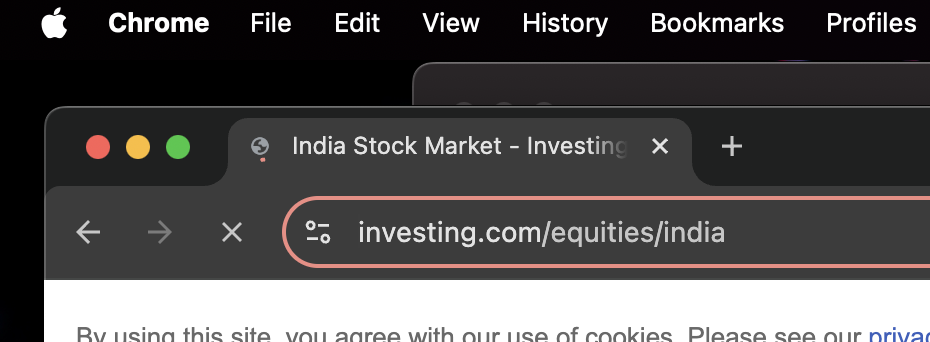

In [ ]:
display(Image(filename="photos/photo_1.png"))

以下のようなblockを消去する

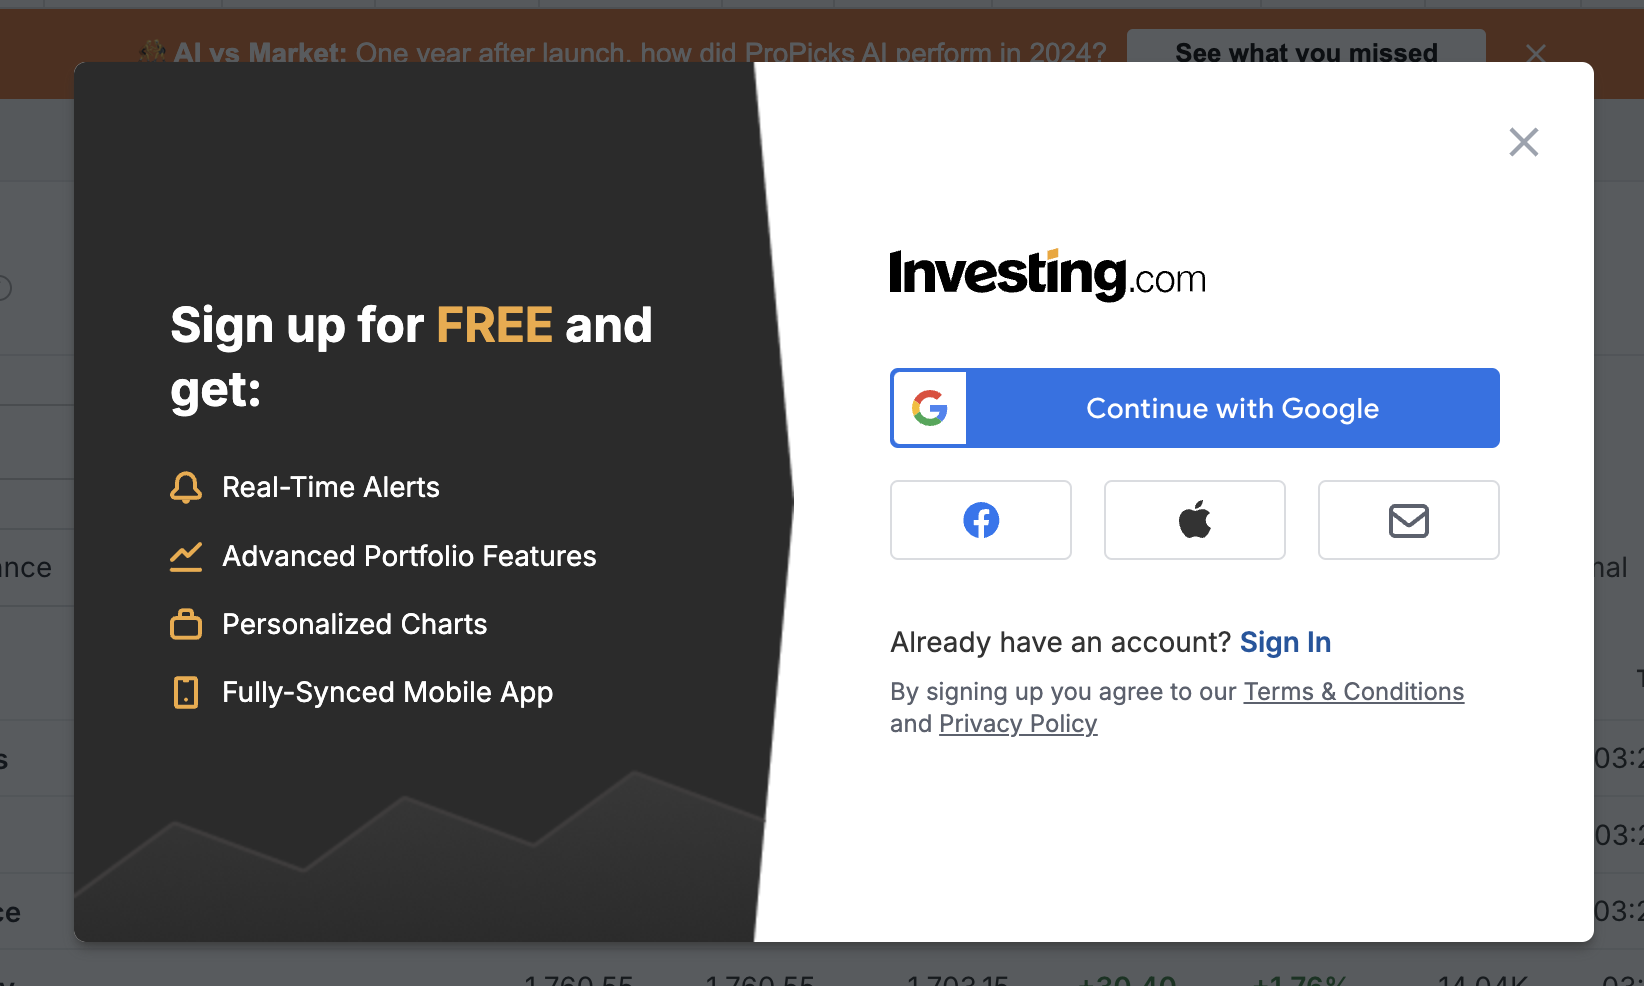

In [ ]:
display(Image(filename="photos/photo_5.png"))

ばつ印のタグを探してclickする

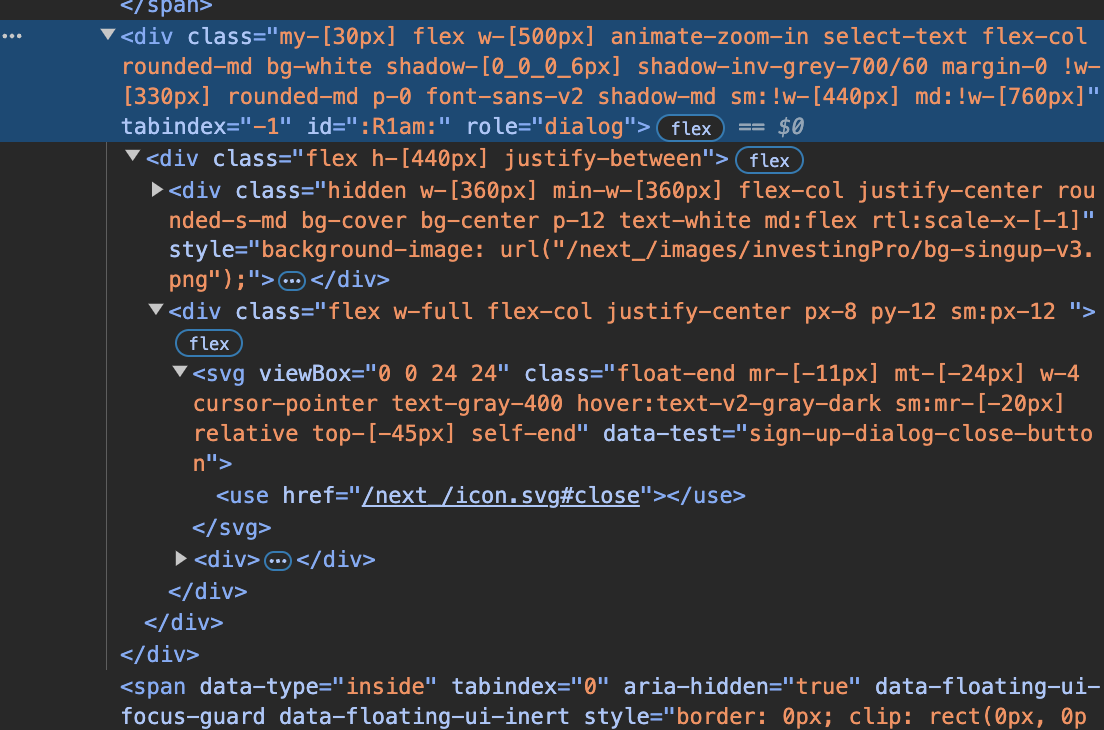

In [ ]:
display(Image(filename="photos/photo_11.png"))

In [ ]:
page.ele("#:R1am:").ele("tag:svg").click()

True

all stocks に変更する

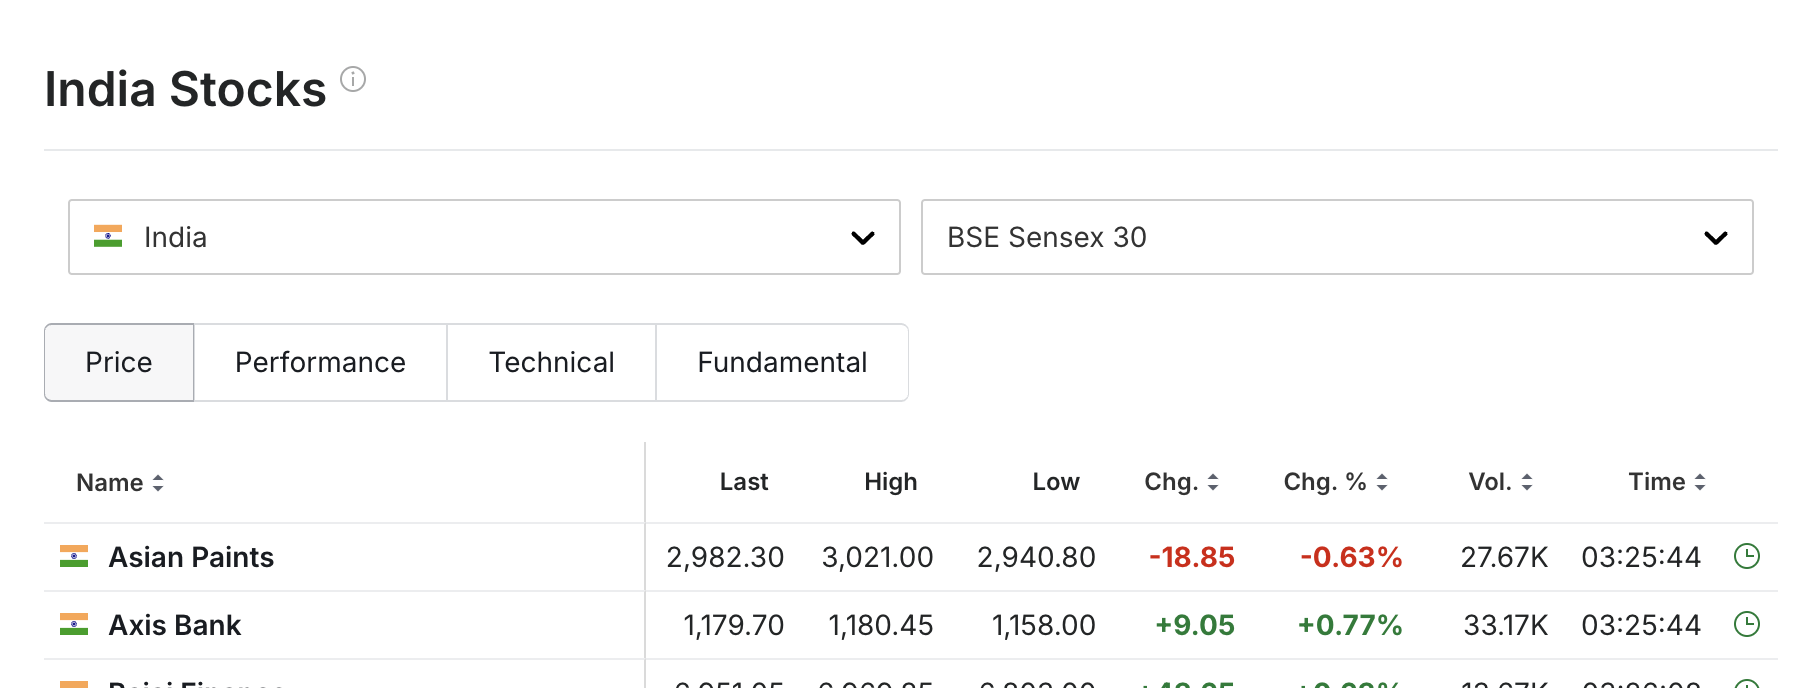

In [ ]:
display(Image(filename="photos/photo_2.png"))

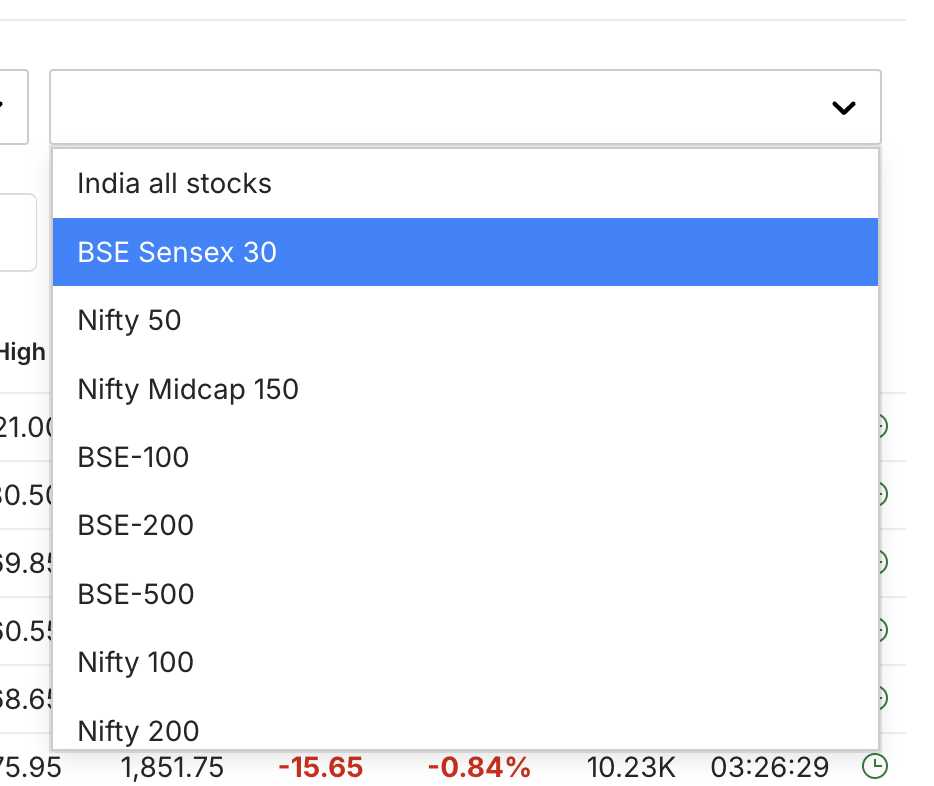

In [ ]:
display(Image(filename="photos/photo_3.png"))

会社のリストは下までスクロールすると、読み込みが必要なことがわかる

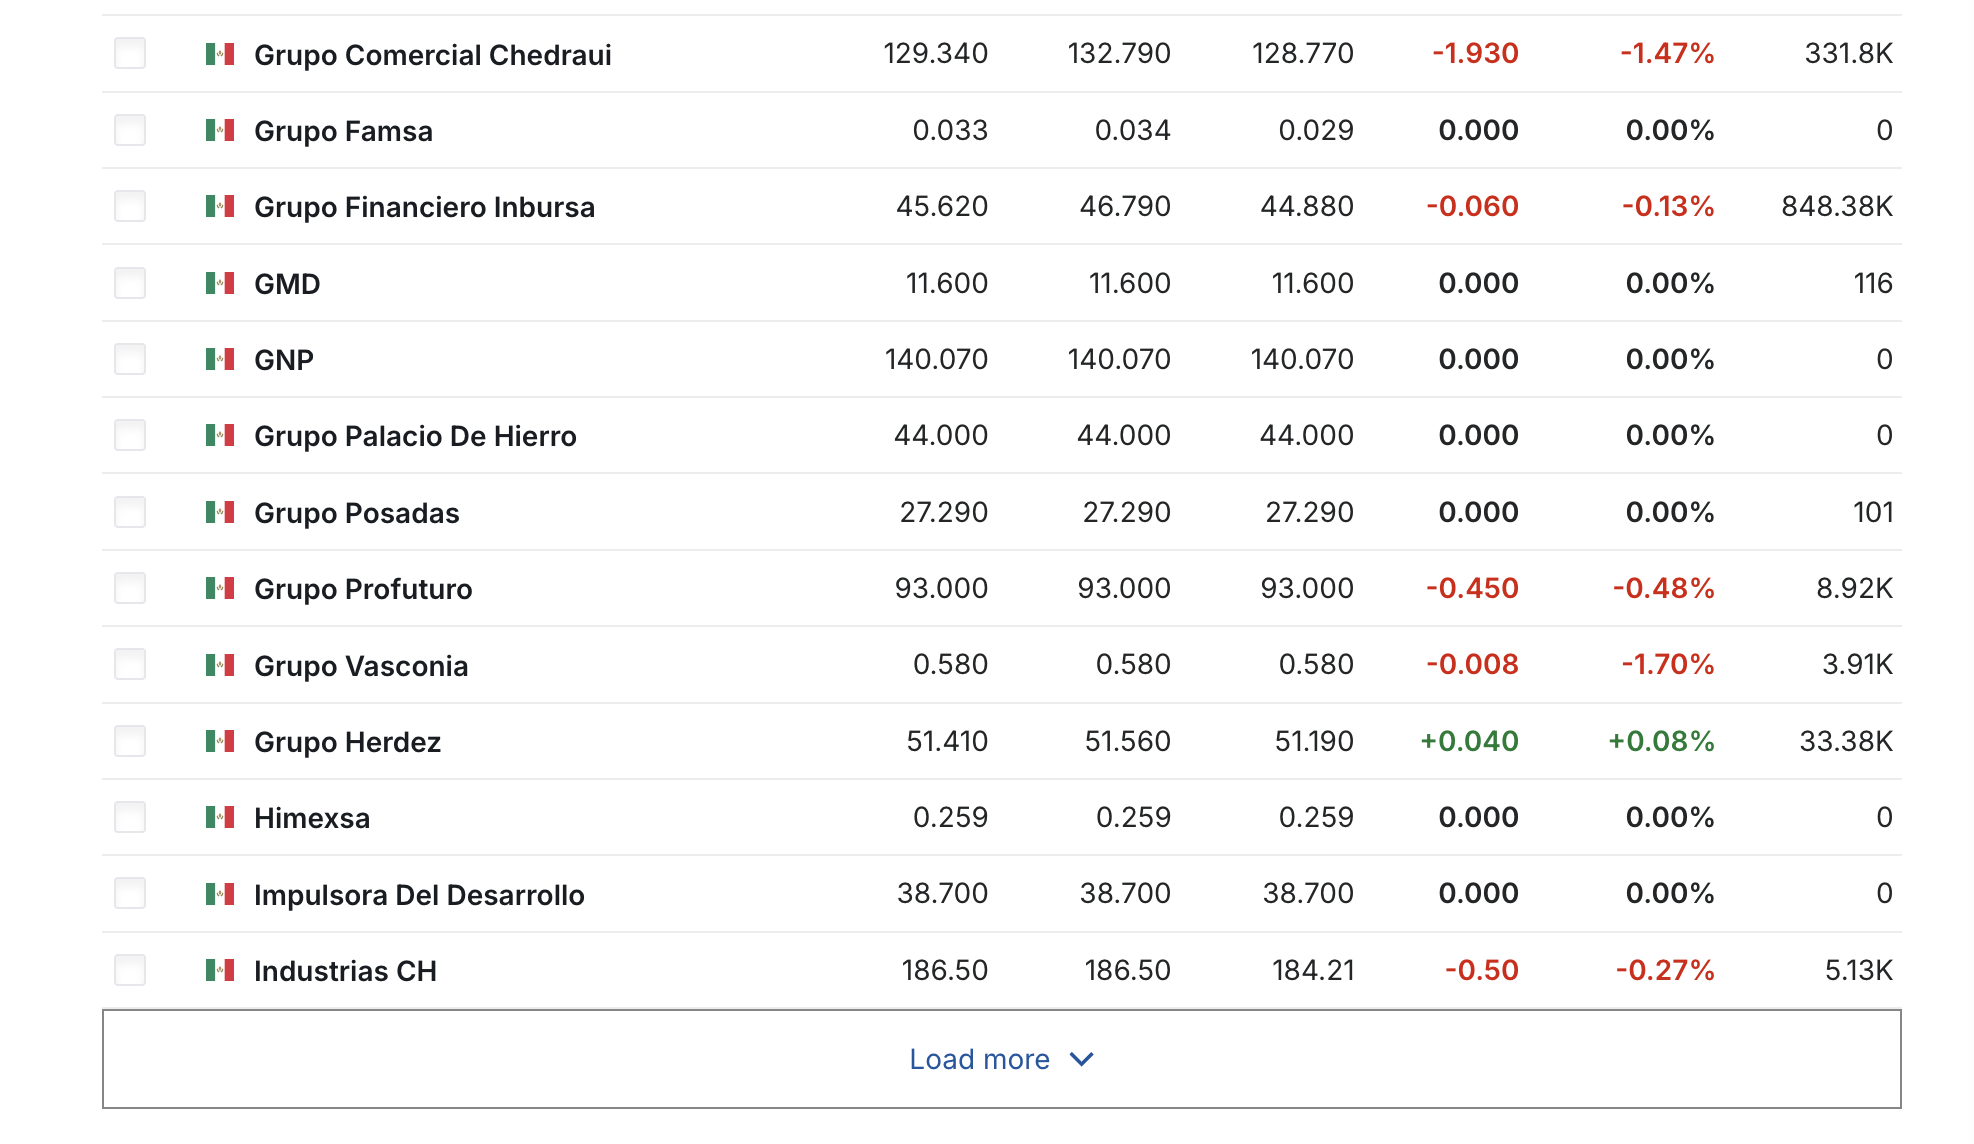

In [ ]:
display(Image(filename="photos/photo_4.png"))

全ての会社のlinkを取得するために　’Load more'をクリックする

In [ ]:
page.eles(".load-more_loadMoreContainer__W_wu6")

[<ChromiumElement div class='load-more_loadMoreContainer__W_wu6'>]

In [ ]:
page.ele(".load-more_loadMoreContainer__W_wu6").click()

True

この操作を機械的に行う

In [ ]:
for _ in range(60):
    try:
        sleep(2)
        page.ele(".load-more_loadMoreContainer__W_wu6").click()

    except:
        break

class名は複数使われていたりするので、徐々に範囲を狭めていって確実にとるのがスクレイピングの鉄則。

id > クラス名 > tag の順で当たりをつけるが、この時、idやtagは名前が乱数であったり、複雑であったりする場合がある。これはスクレイピング対策で動的に変化するものであったり、サイトによって変わるものであったりするので避けた方が良い

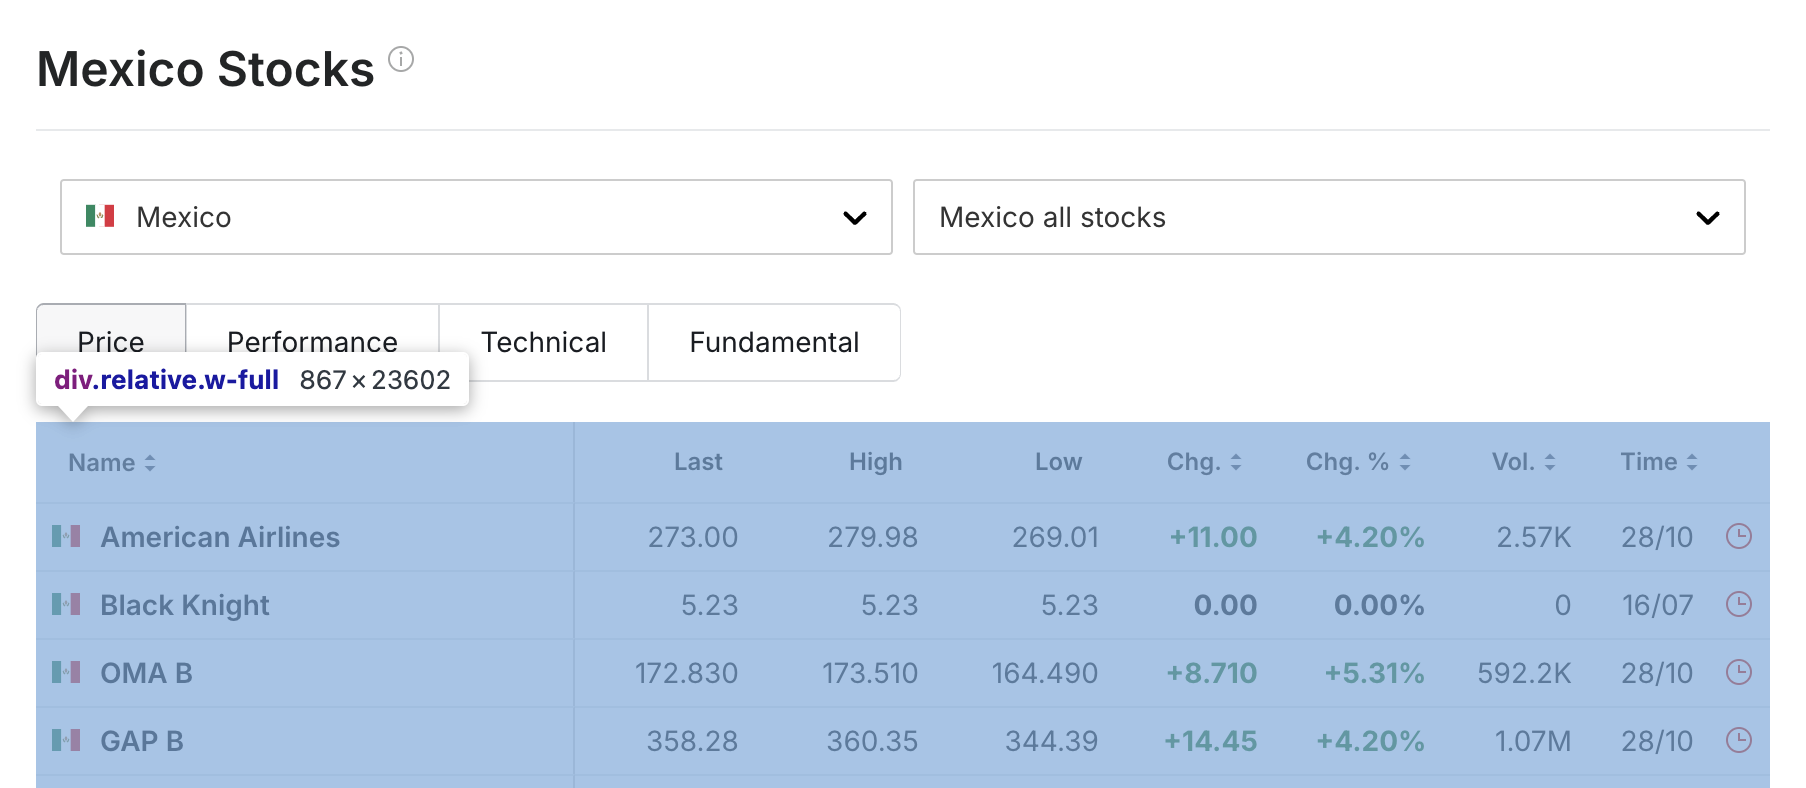

In [ ]:
display(Image(filename="photos/photo_6.png"))

In [ ]:
page.eles('.relative w-full')[0].text

"\tName\n\tLast\n\tHigh\n\tLow\n\tChg.\n\tChg. %\n\tVol.\n\tTime\n\tAmerican Airlines\n\t273.00\t279.98\t269.01\t+11.00\t+4.20%\t2.57K\t28/10\n\tBlack Knight\n\t5.23\t5.23\t5.23\t0.00\t0.00%\t0\t16/07\n\tOMA B\n\t172.830\t173.510\t164.490\t+8.710\t+5.31%\t592.2K\t28/10\n\tGAP B\n\t358.28\t360.35\t344.39\t+14.45\t+4.20%\t1.07M\t28/10\n\tGrupo Radio Centro\n\t4.000\t4.000\t4.000\t0.000\t0.00%\t0\t16/07\n\tDesarrolladora Homex\n\t0.002\t0.002\t0.002\t0.000\t0.00%\t25.85K\t28/10\n\tGeneral Motors\n\t1,053.50\t1,053.50\t1,029.21\t+12.84\t+1.23%\t234\t28/10\n\tCitigroup\n\t1,284.75\t1,289.49\t1,230.90\t+44.75\t+3.61%\t1.12K\t28/10\n\tABB ADR\n\t663.00\t663.00\t663.00\t0.00\t0.00%\t0\t16/07\n\tMercedes Benz Group\n\t1,254.53\t1,254.53\t1,254.53\t0.00\t0.00%\t831\t24/10\n\tOrange ADR\n\t232.00\t232.00\t232.00\t0.00\t0.00%\t0\t06/09\n\tSanofi ADR\n\t1,071.00\t1,071.00\t1,071.00\t0.00\t0.00%\t630\t25/10\n\tBBVA\n\t197.00\t197.00\t197.00\t+1.68\t+0.86%\t715\t28/10\n\tTelefonica ADR\n\t83.56\t83.5

確実に取れているか、textで確認しながら進める

こういう表形式はtheadでカラム名、tbodyに値が格納されていることが多い。
また、値の行はtagが並列されていることが多い。(今回であればtrタグ）

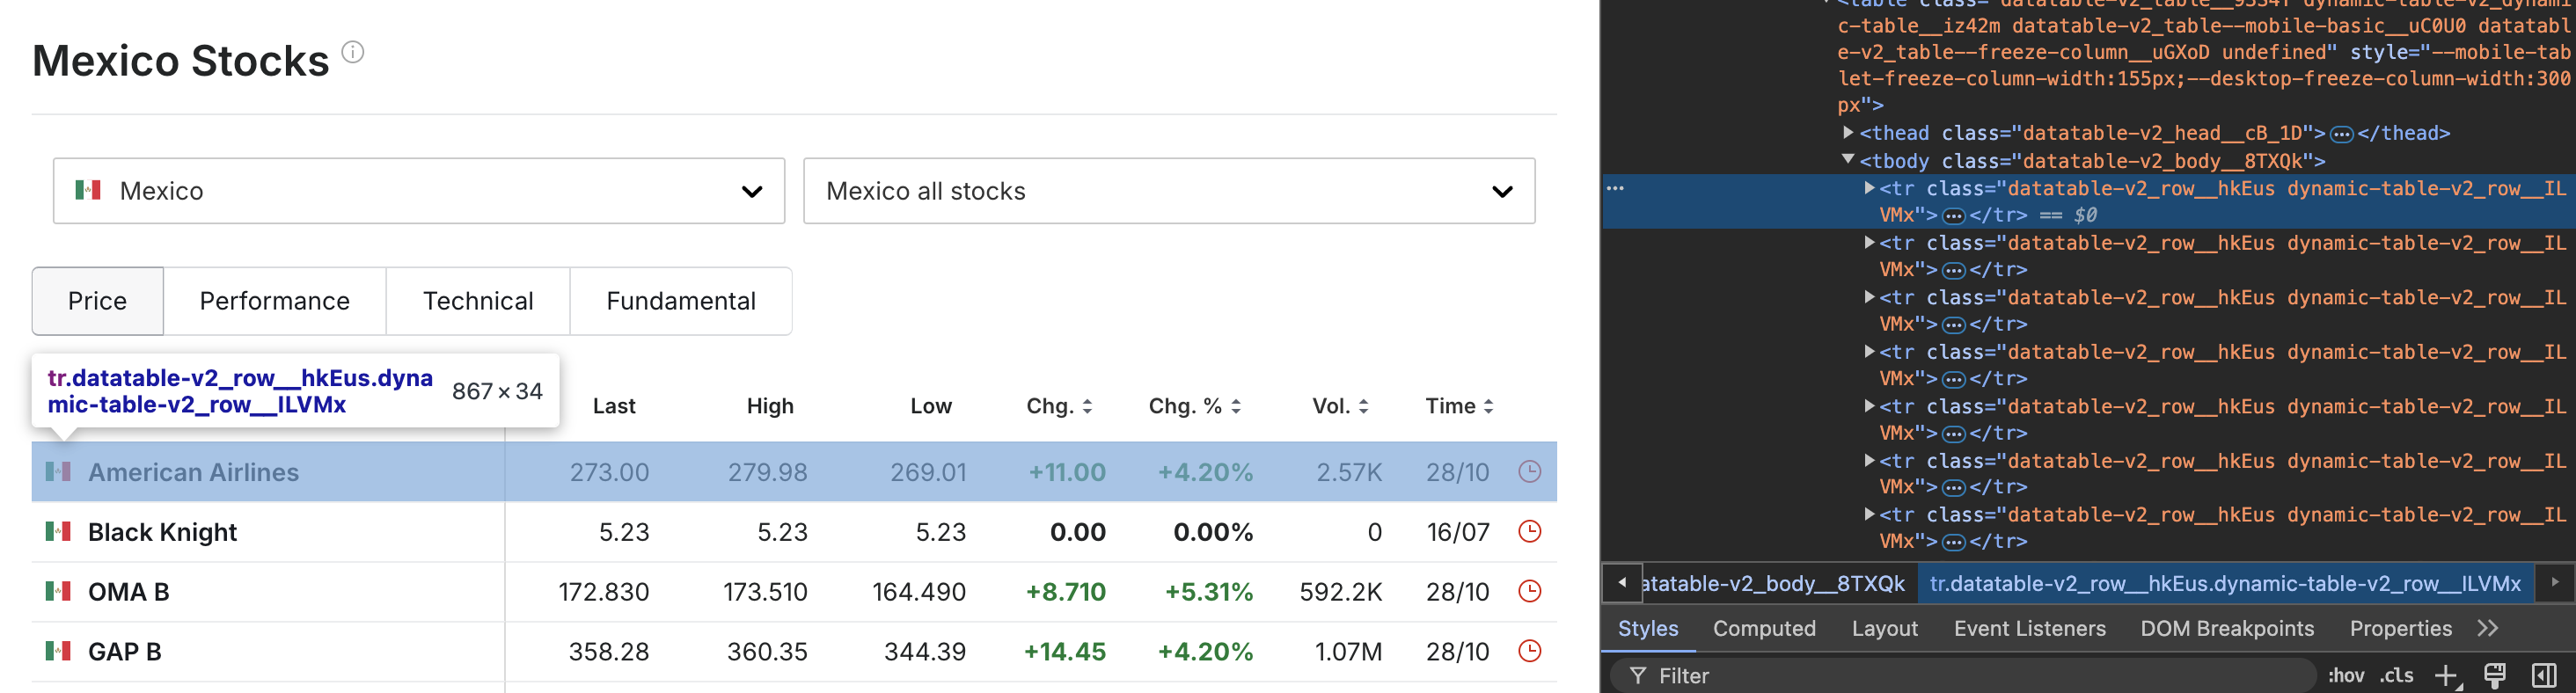

In [ ]:
display(Image(filename="photos/photo_9.png"))

In [ ]:
large_box = page.ele('.relative w-full')
len(large_box.eles('tag:tbody')[0].eles('tag:tr'))

693

これで会社数を見る。これが大まか実際のサイトとあってるか確認しておく。

In [ ]:
company_boxes = large_box.eles('tag:tbody')[0].eles('tag:tr')
print("最初の会社: " + company_boxes[0].text)
print("最後の会社: " + company_boxes[-1].text)

最初の会社: 	American Airlines
	273.00	279.98	269.01	+11.00	+4.20%	2.57K	28/10
最後の会社: 	Concentradora HipotecariaPI
	16.00	16.39	16.00	-0.01	-0.06%	3.71K	24/10


一気にとる前にdebugして確実性を高める

今回は名前とurlを取得する

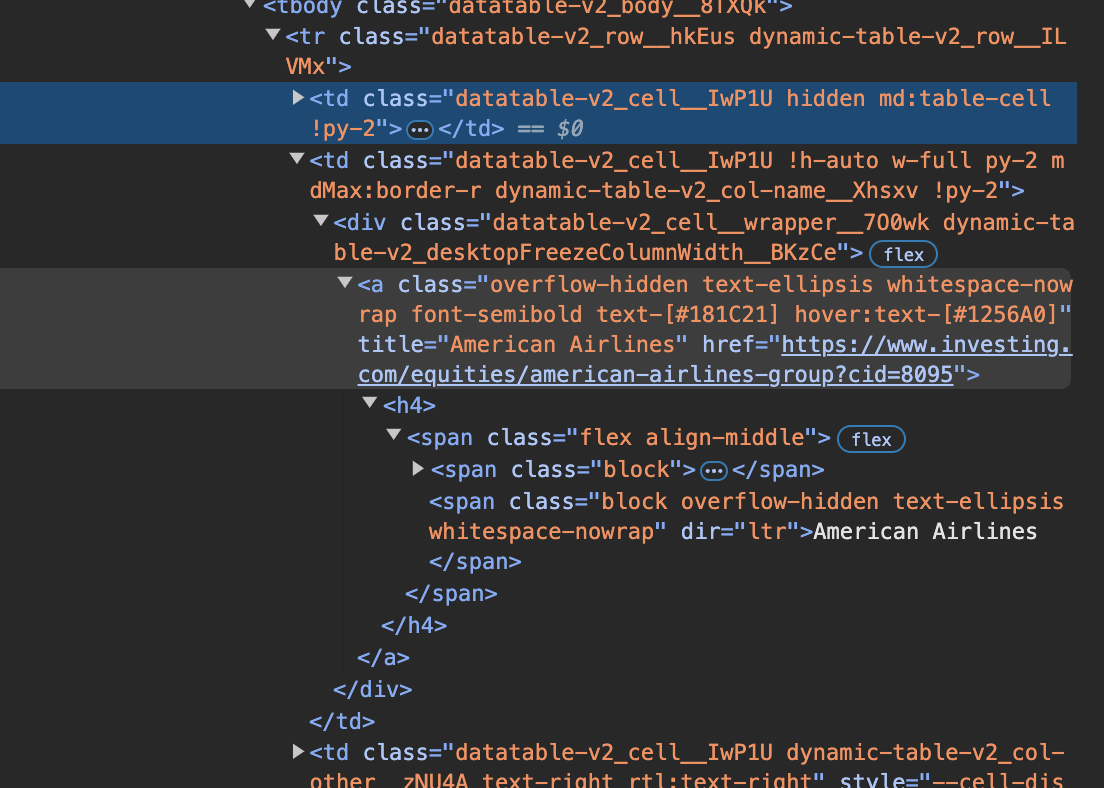

In [ ]:
display(Image(filename="photos/photo_7.png"))

In [ ]:
company_boxes[0].eles('tag:td')[1].text

'American Airlines'

.ele('tag:a').attr('href')でURLをとれることは覚えておく

In [ ]:
company_boxes[0].eles('tag:td')[1].ele('tag:a').attr('href')

'https://www.investing.com/equities/american-airlines-group?cid=8095'

以下のような方法でサクッと情報を取れるようにする

In [ ]:
list = []

large_box = page.ele('.relative w-full')
company_boxes = large_box.eles('tag:tbody')[0].eles('tag:tr')

for company_box in tqdm(company_boxes): #tqdmで進行状況を可視化
    company_data = [] #各会社ごとに要素をまとめる
    company_name = company_box.eles('tag:td')[1].text
    company_url = company_box.eles('tag:td')[1].ele('tag:a').attr('href')
    company_data.append(company_name) #要素１：会社名
    company_data.append(company_url) #要素２：URL
    list.append(company_data) #要素２とをまとめたリストを高次元リストにまとめていく

df = pd.DataFrame(list, columns = ['name', 'url'])
df.to_csv('investing.com_urls.csv')

  0%|          | 0/693 [00:00<?, ?it/s]

In [ ]:
df.head()

,name,url
0,American Airlines,https://www.investing.com/equities/american-ai...
1,Black Knight,https://www.investing.com/equities/buckeye-tec...
2,OMA B,https://www.investing.com/equities/oma-b
3,GAP B,https://www.investing.com/equities/grupo-aerop...
4,Grupo Radio Centro,https://www.investing.com/equities/grupo-radio...


In [ ]:
##########以下はこれ以降の問題のための調整###########

#実行だけしてコードを読み込まなくても良い

################################################

for i in range(df.shape[0]):

    url = df.at[i,'url']
    if 'cid' in url:
        df.at[i,'url'] = url.split('?cid')[0]
        print(df.at[i,'url'])

df = df[:10]

### step 2

各会社のページから情報をとる

ISINという識別番号は会社をマッチングさせるときに非常に重要

In [ ]:
df.at[0, 'url'] #df.locでも良いが、df.locは参照するだけなのであたいの置き換えなどに対応したatの方が推奨

'https://www.investing.com/equities/american-airlines-group'

In [ ]:
i = 0 #行数を先に指定しておくと便利

url = df.at[i, 'url']
page.get(url)

True

ISINは中央の表の右下にあるのでまずは表自体をとる

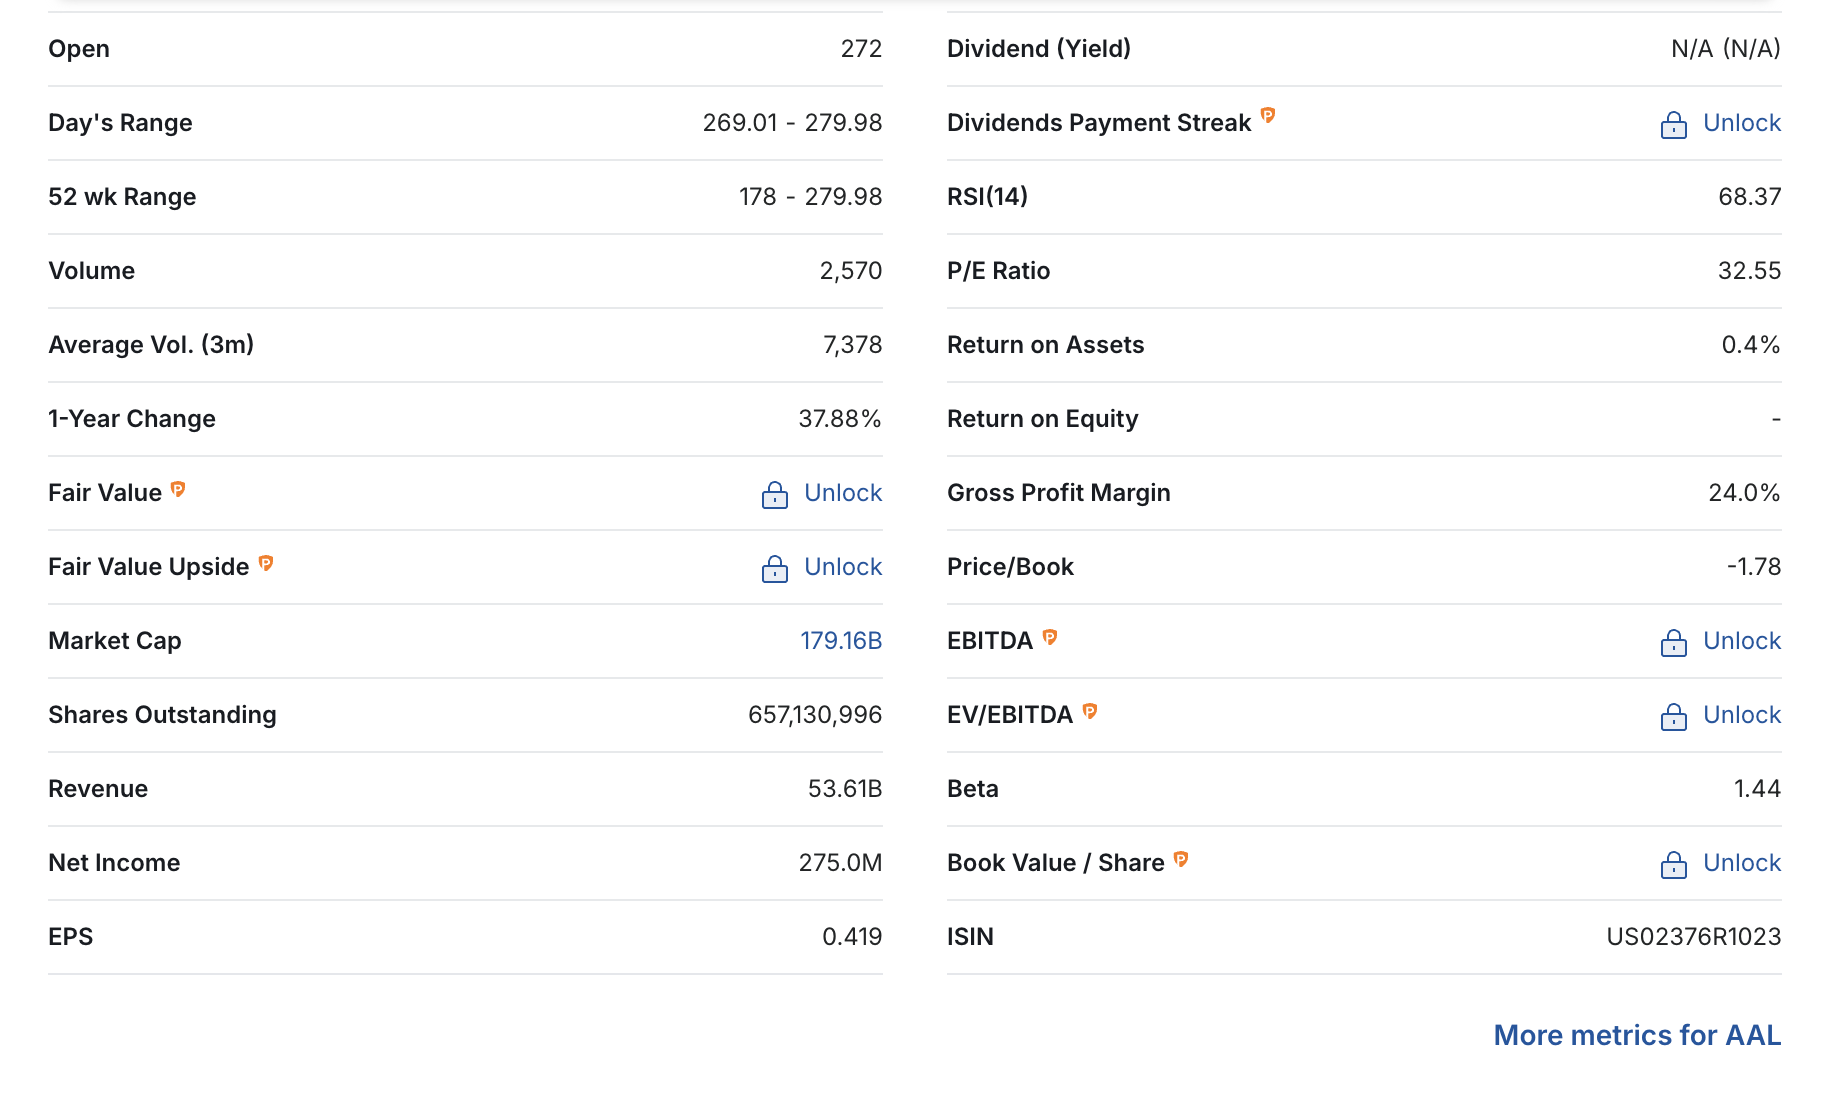

In [ ]:
display(Image(filename="photos/photo_8.png"))

In [ ]:
page.eles('.mb-5 flex-wrap sm:flex')

[<ChromiumElement div class='mb-5 flex-wrap sm:flex'>]

dlタグで大まかに分かれていることを見抜く。最後のdlタグにISINはあるので、そこに焦点を当てる

In [ ]:
table = page.ele('.mb-5 flex-wrap sm:flex') #eleに変更するのを忘れない
table.eles('tag:dl')

[<ChromiumElement dl class='flex-1 sm:mr-8 sm:hidden md:block'>,
 <ChromiumElement dl class='flex-1 sm:mr-8 hidden sm:hidden md:block'>,
 <ChromiumElement dl class='flex-1 hidden sm:hidden md:block'>,
 <ChromiumElement dl class='flex-1 hidden sm:mr-8 sm:block md:hidden'>,
 <ChromiumElement dl class='flex-1 hidden sm:block md:hidden'>]

In [ ]:
table.eles('tag:dl')[-1].text

'EPS Growth Forecast\nUnlock\nNext Earnings Date\n-\nDividend (Yield)\nN/A\n(N/A)\nDividends PaymentStreak\nUnlock\nRSI(14)\n68.37\nP/E Ratio\n32.55\nReturn on Assets\n0.4%\nReturn on Equity\n-\nGross Profit Margin\n24.0%\nPrice/Book\n-1.78\nEBITDA\nUnlock\nEV/EBITDA\nUnlock\nBeta\n1.44\nBook Value / Share\nUnlock\nISIN\nUS02376R1023'

このテーブルの中はさらにdivタグで分かれている

In [ ]:
smaller_table = table.eles('tag:dl')[-1]
len(smaller_table.eles('tag:div')) #数での確認が大切

27

In [ ]:
smaller_table.eles('tag:div')[-1].text

'ISIN\nUS02376R1023'

これだと"ISIN"という文字が邪魔であるのでさらに細かくとる

In [ ]:
smaller_table.eles('tag:div')[-1].ele('tag:dd').text

'US02376R1023'

これを一気に動かすコードを作る

In [ ]:
df['ISIN'] = None

In [ ]:
for i in range(df.shape[0]):

    url = df.at[i, 'url']
    page.get(url)

    table = page.ele('.mb-5 flex-wrap sm:flex')
    smaller_table = table.eles('tag:dl')[-1]
    ISIN = smaller_table.eles('tag:div')[-1].ele('tag:dd').text

    df.at[i, 'ISIN'] = ISIN #これがdf.locだと置き換わらない場合がある

### exercise 1:
以下の情報をこのdfに加えよう

・Total Revenues（最新年度）
・EBITDA（最新年度）

<ヒント> FinancialsのセクションのIncome Statementのページにある
・

In [ ]:
url

'https://www.investing.com/equities/american-airlines-group'

In [ ]:
url_IS = 'https://www.investing.com/equities/american-airlines-group-income-statement'
url_IS

'https://www.investing.com/equities/american-airlines-group-income-statement'

元のURLに-income-statementを加えた形である。

In [ ]:
url_IS = url + "-income-statement"
page.get(url_IS)

True

In [ ]:
page.eles('.relative w-full overflow-x-auto')

[<ChromiumElement div class='relative w-full overflow-x-auto'>]

In [ ]:
sections = page.ele('.relative w-full overflow-x-auto').ele('tag:tbody').eles('tag:tr')
revenue = sections[0].eles('tag:td')[-1].text
EBITDA = sections[-8].eles('tag:td')[-1].text

In [ ]:
for i in tqdm(range(df.shape[0])):
    try:
        url = df.at[i, 'url']

        url_IS = url + "-income-statement"
        page.get(url_IS)

        sleep(1) #ページ遷移に時間を与える

        sections = page.ele('.relative w-full overflow-x-auto').ele('tag:tbody').eles('tag:tr')
        revenue = sections[0].eles('tag:td')[-1].text
        EBITDA = sections[-8].eles('tag:td')[-1].text

    except Exception as e:
        print(f"情報取得に失敗 at index {i}：{e}")

エラーが出る会社があるが今回は、おおかた取れればOKAYである

### おまけ 1: Read More

このセクションでは、read moreというボタンを押さないと情報が表示されないものに対して以下に正確に取るかを指南する

In [ ]:
i = 0
url = df.at[i, 'url']

url

'https://www.investing.com/equities/american-airlines-group'

このページに"American Airlines Group Company Profile"というセクションがある

この情報を取りたいが、とるには"read more"を押さないといけない

In [ ]:
page.get(url)

True

In [ ]:
page.eles('.flex-none')

[<ChromiumElement div class='flex-none'>]

In [ ]:
page.ele('.flex-none').ele('tag:button').text

'Read More'

In [ ]:
page.ele('.flex-none').ele('tag:button').click()

True

In [ ]:
page.ele('.flex-none').ele('tag:button').text

'See Less'

クリックという操作は不安定な操作であるので、debugを必ずする。

クリック前後で'Read More'から'See Less'に変化することがわかる。これをdebugとして使う。

In [ ]:
click = 0

while click < 2:
    if 'See Less' in page.ele('.flex-none').ele('tag:button').text:
        break
    page.ele('.flex-none').ele('tag:button').click()
    click += 1


In [ ]:
page.ele('.flex-initial overflow-hidden text-ellipsis').text

'American Airlines Group Inc., through its subsidiaries, operates as a network air carrier. The company provides scheduled air transportation services for passengers and cargo through its hubs in Charlotte, Chicago, Dallas/Fort Worth, Los Angeles, Miami, New York, Philadelphia, Phoenix, and Washington, D.C., as well as through partner gateways in London, Doha, Madrid, Seattle/Tacoma, Sydney, and Tokyo. It operates a mainline fleet of 965 aircraft. The company was formerly known as AMR Corporation and changed its name to American Airlines Group Inc. in December 2013. American Airlines Group Inc. was founded in 1926 and is headquartered in Fort Worth, Texas.'

'profile'というカラムをdfに追加してみよう

In [ ]:
df.at['profile'] = None

In [ ]:
for i in tqdm(range(df.shape[0])):
    url = df.at[i, 'url']
    page.get(url)

    click = 0

    while click < 2:
        if 'See Less' in page.ele('.flex-none').ele('tag:button').text:
            break
        page.ele('.flex-none').ele('tag:button').click()
        click += 1

    df.at[i, 'profile'] = page.ele('.flex-initial overflow-hidden text-ellipsis').text


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

### おまけ 2: hover

これはスクレイピングタスクの中で最もマンイドが高いもので、カーソルをかざさないと情報が出てこないものをどうとるかを説明する。これはごく稀にしか出てこないので、今の段階では実行しながら雰囲気を掴んでおき、いざ出てきたらこの欄を参照しながら取り組むと良い。

先ほどと同じページに、AAL Income Statementというグラフがあるのがわかる。ここから情報を取りたい。

しかし、カーソルをかざさないと情報が出てこない。ここでhoverをスクレイピングでする。

先ほどと同様にタグを探していくのだが、ここで要注意である。グラフにはgタグがたくさんある。グラフからの情報取得の汎用性を高めるために範囲を限定する必要がある。highcharts-series-groupというクラスタグを利用して絞ると、グラフの軸などを排除でき、グラフの要素に絞れることがわかる。


In [ ]:
page.ele('.IncomeStatementView_incomeStatement__uLpT_').ele('.highcharts-series-group').eles('tag:g')

[<ChromiumElement g class='highcharts-series highcharts-series-0 highcharts-column-series highcharts-color-0 highcharts-tracker' data-z-index='0.1' opacity='1' transform='translate(10,10) scale(1 1)' clip-path='url(#highcharts-4k3eeb9-287-)'>,
 <ChromiumElement g class='highcharts-markers highcharts-series-0 highcharts-column-series highcharts-color-0' data-z-index='0.1' opacity='1' transform='translate(10,10) scale(1 1)' clip-path='none'>,
 <ChromiumElement g class='highcharts-series highcharts-series-1 highcharts-column-series highcharts-color-1 highcharts-tracker' data-z-index='0.1' opacity='1' transform='translate(10,10) scale(1 1)' clip-path='url(#highcharts-4k3eeb9-287-)'>,
 <ChromiumElement g class='highcharts-markers highcharts-series-1 highcharts-column-series highcharts-color-1' data-z-index='0.1' opacity='1' transform='translate(10,10) scale(1 1)' clip-path='none'>]

その中のgタグ四つのうち、二つがグラフを表していることがわかる。これはグラフでよく見るケースで、一つおきにそれぞれの棒グラフを表すタグがくる（グラフのlegendで示される種類の２倍の数のタグがある）。

見つけた棒グラフの要素のうちほしい年度のタグ（今回であればpathタグで絞れる）を見つけ、それにホバーすることでデータが表示される。

In [ ]:
page.ele('.IncomeStatementView_incomeStatement__uLpT_').ele('.highcharts-series-group').eles('tag:g')[0].eles('tag:path')[-1].hover()

上記のコードでホバーさせている間に、ホバーにより表示されているデータがどのタグに紐づいているかをhtmlのところから、手作業で探す。

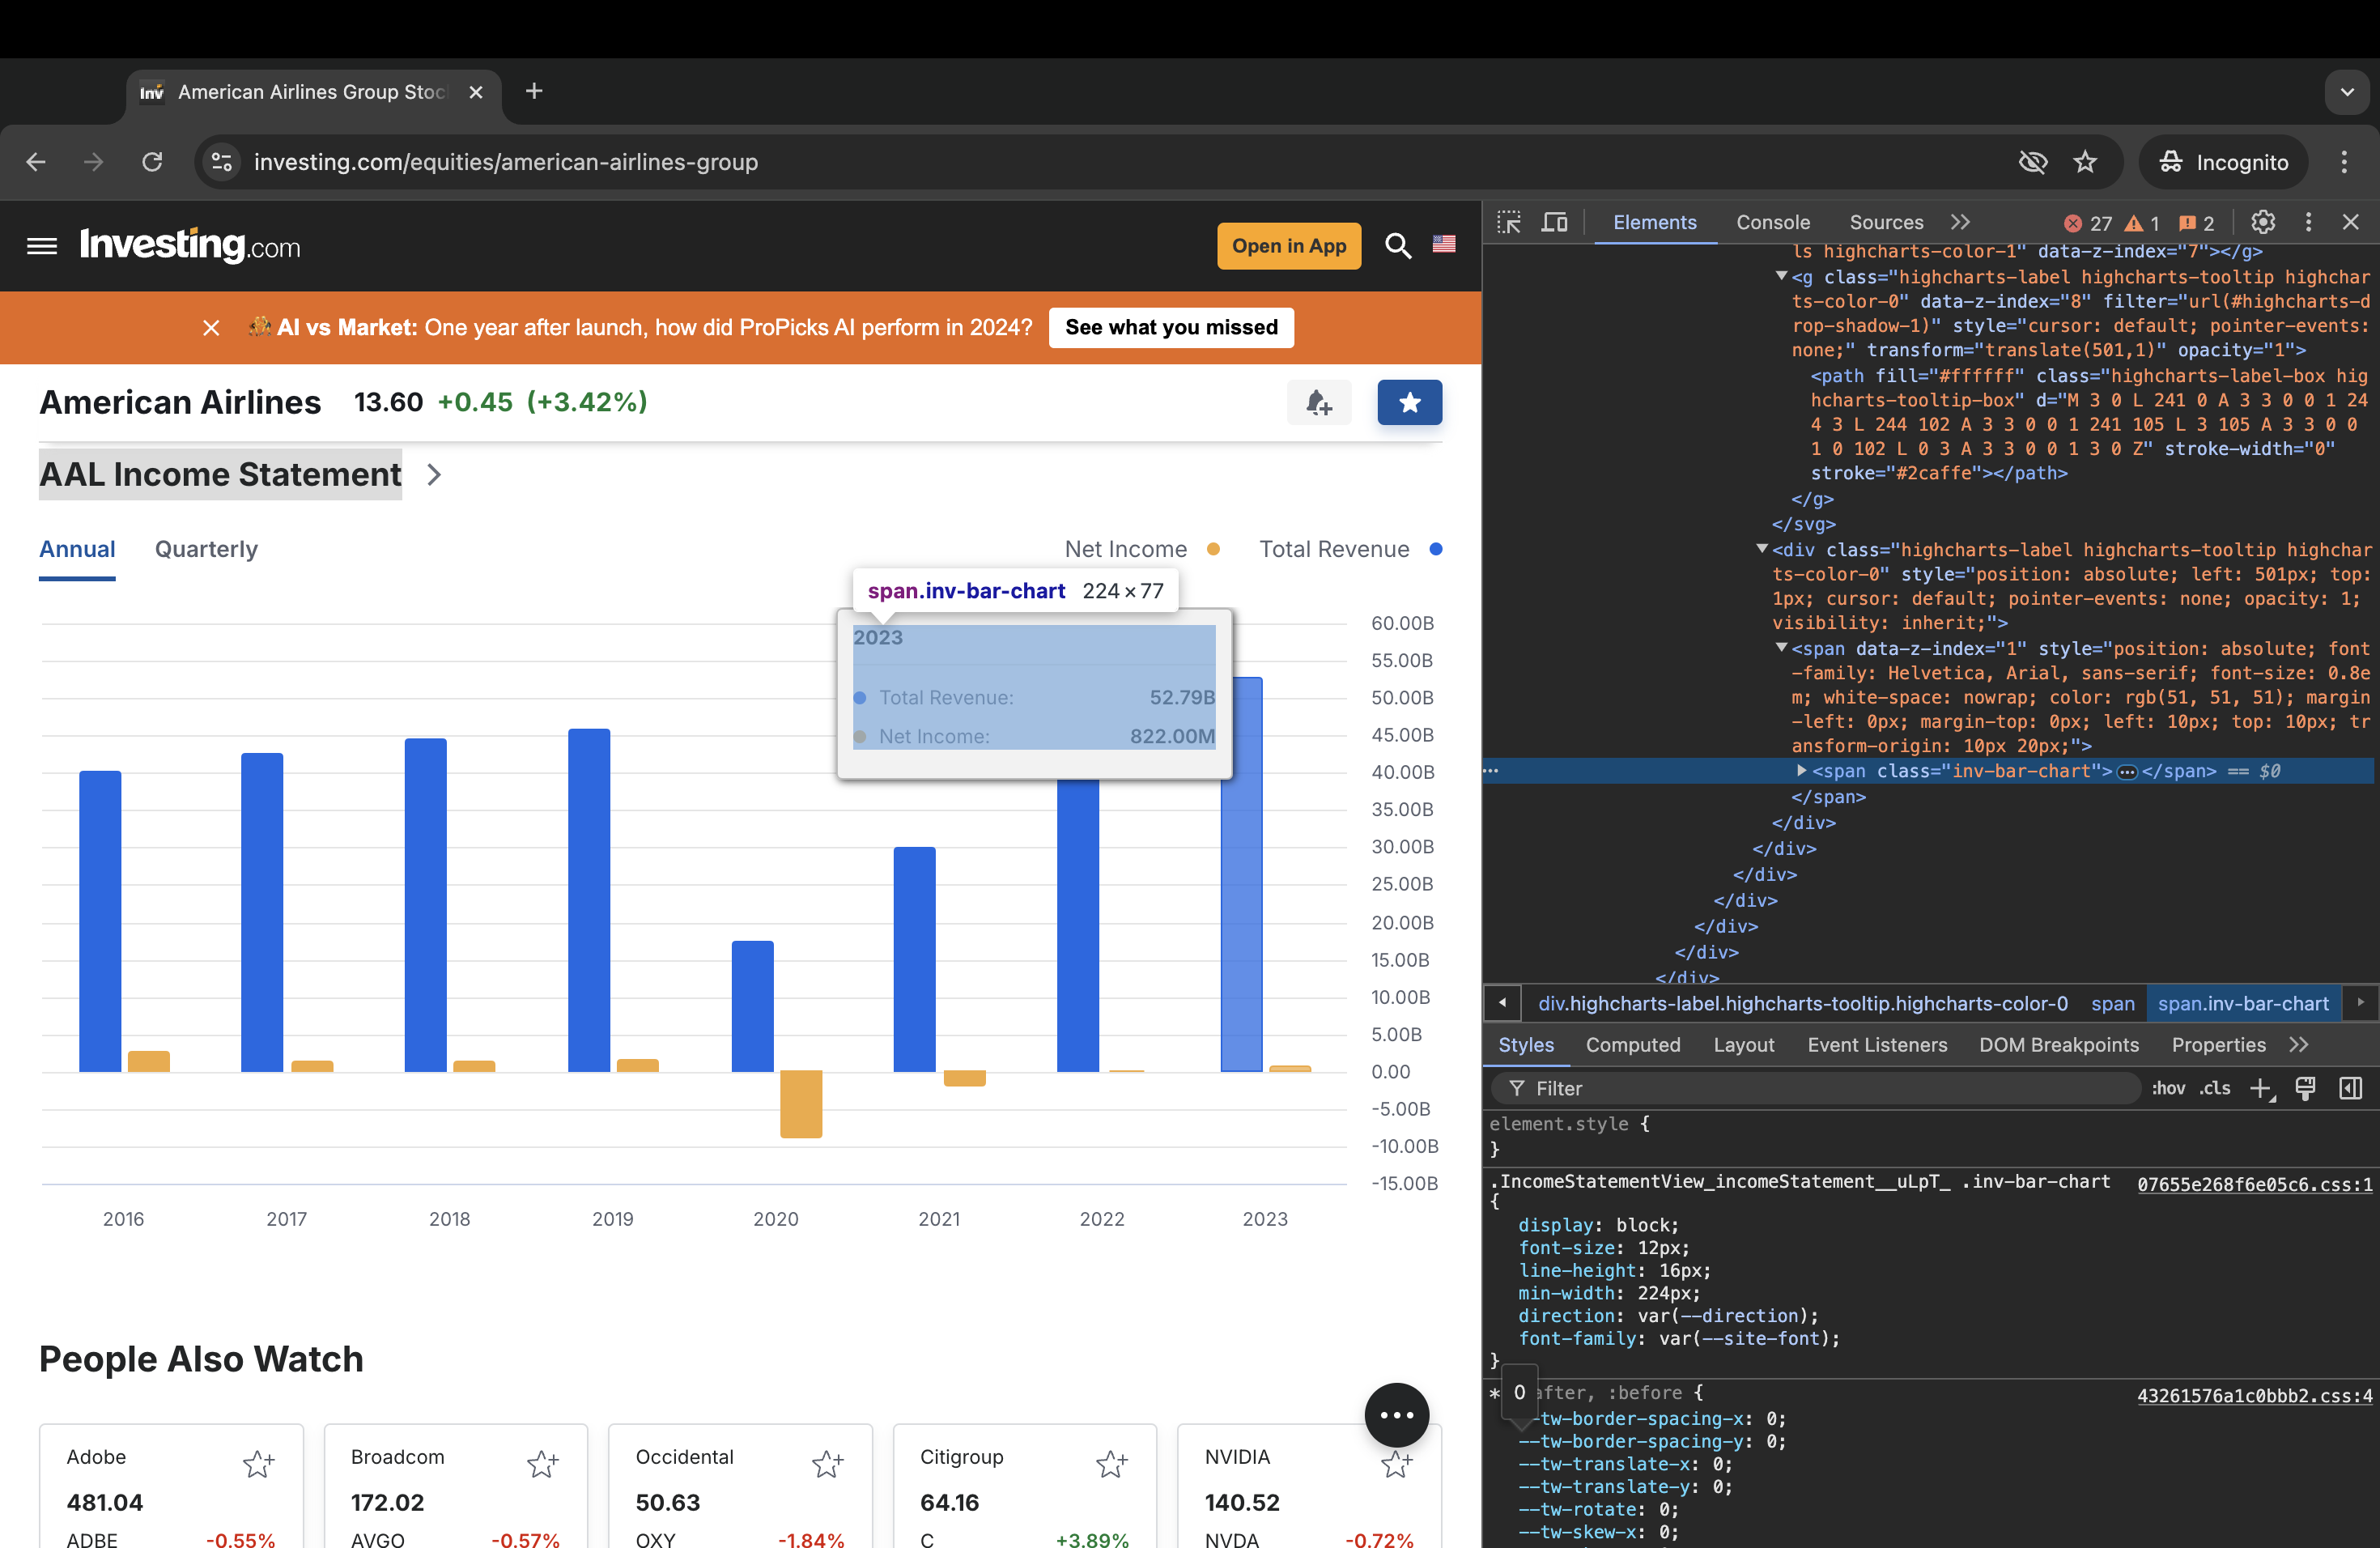

In [ ]:
display(Image(filename="photos/photo_10.png"))

In [ ]:
page.eles('.inv-bar-chart')

[<ChromiumElement span class='inv-bar-chart'>]

今回は年度とTotal Incomeを探す

In [ ]:
page.ele('.inv-bar-chart').eles('tag:span')[0].text

'2023'

In [ ]:
page.ele('.inv-bar-chart').eles('tag:span')[-1].text #一番最後などは確実性が高い

'822.00M'

ここでhoverされているかのdebugを考える。これは時と場合によるが今回であれば、年度に着目してこれが４桁の整数であれば良いのでこれをdebugとして使う。

In [ ]:
try:
    # Retrieve the text and convert it to an integer
    digits = int(page.ele('.inv-bar-chart').eles('tag:span')[0].text)

    # Check if `digits` is a four-digit integer
    if 1000 <= digits <= 9999:
        print("Success: 'digits' is a four-digit integer:", digits)
    else:
        print("Error: 'digits' is not a four-digit integer. Value found:", digits)
except ValueError:
    print("Error: Unable to convert text to integer. Check the source data.")
except Exception as e:
    print("Unexpected error:", e)

Success: 'digits' is a four-digit integer: 2023


これらの情報もdfに追加しておこう

In [ ]:
df.at['year'] = None
df.at['Net Income'] = None

In [ ]:
for i in tqdm(range(df.shape[0])):
    url = df.at[i, 'url']
    page.get(url)

    hover = 0

    try:
        while hover < 3:

            element_to_hover = page.ele('.IncomeStatementView_incomeStatement__uLpT_').ele('.highcharts-series-group').eles('tag:g')[0].eles('tag:path')[-1]
            element_to_hover.hover()

            # Retrieve the text and convert it to an integer
            digits = int(page.ele('.inv-bar-chart').eles('tag:span')[0].text)

            # Check if `digits` is a four-digit integer
            if 1000 <= digits <= 9999:
                df.at[i, 'year'] = page.ele('.inv-bar-chart').eles('tag:span')[0].text
                df.at[i, 'Net Income'] = page.ele('.inv-bar-chart').eles('tag:span')[-1].text
                break
            else:
                page.get(url)
                hover += 1

    except ValueError as ve:
        #print(f"Error: Unable to convert text to integer for URL {url}. Check the source data. Details:", ve)

        page.get(url)
        hover += 1
    except Exception as e:
        # print(f"Unexpected error encountered for URL {url} on hover attempt {hover + 1}: {e}")

        page.get(url)
        hover += 1